<a href="https://colab.research.google.com/github/divyakedia/OIBSIP/blob/main/Task_3_Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

1. Importing the Libraries

In [44]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm



2. Loading the dataset

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data_set = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [47]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
data_set.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


3. Data Preprocessing

In [49]:
data_set.shape

(150, 6)

In [50]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
data_set.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
data_set.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

4. Exploratory data Analysis(EDA)

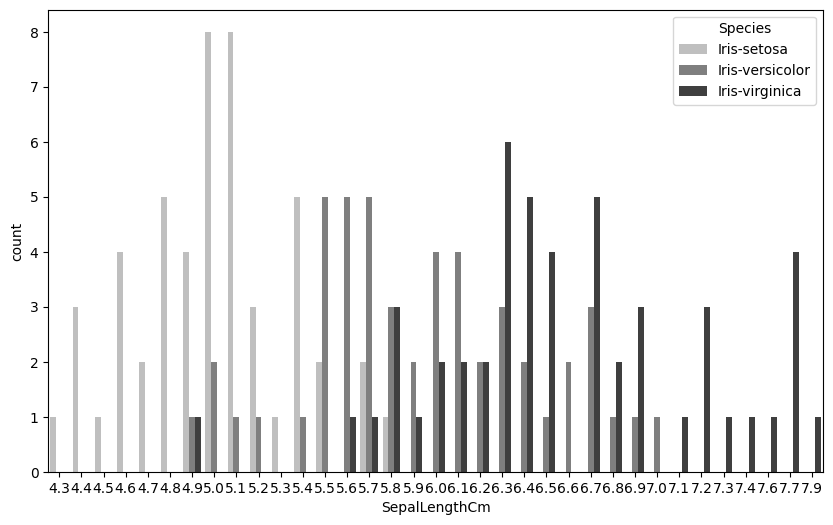

In [53]:
plt.figure(figsize =(10,6))
sns.countplot(x='SepalLengthCm', data=data_set, hue= data_set['Species'], palette= 'binary')
plt.show()

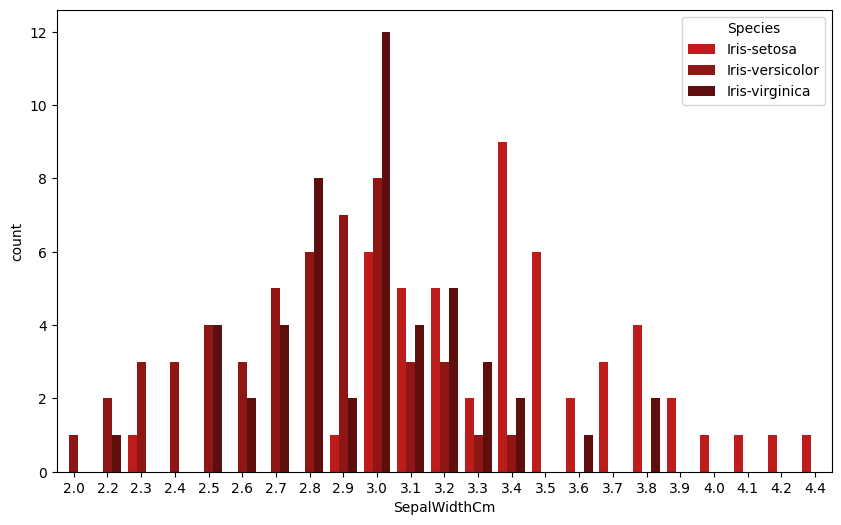

In [54]:
plt.figure(figsize =(10,6))
sns.countplot(x='SepalWidthCm', data=data_set, hue= data_set['Species'], palette= 'flag')
plt.show()

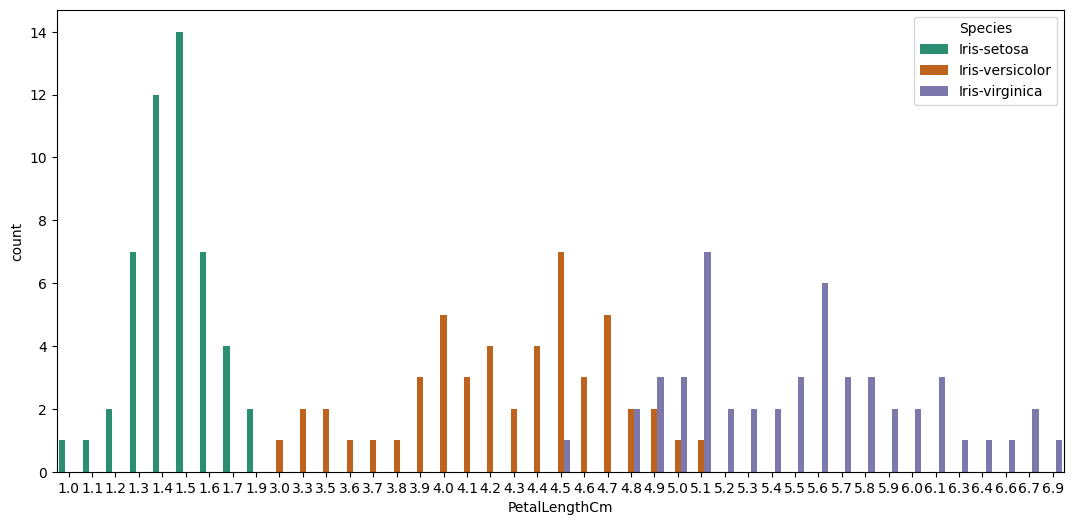

In [55]:
plt.figure(figsize =(13,6))
sns.countplot(x='PetalLengthCm', data=data_set, hue= data_set['Species'], palette= 'Dark2')
plt.show()

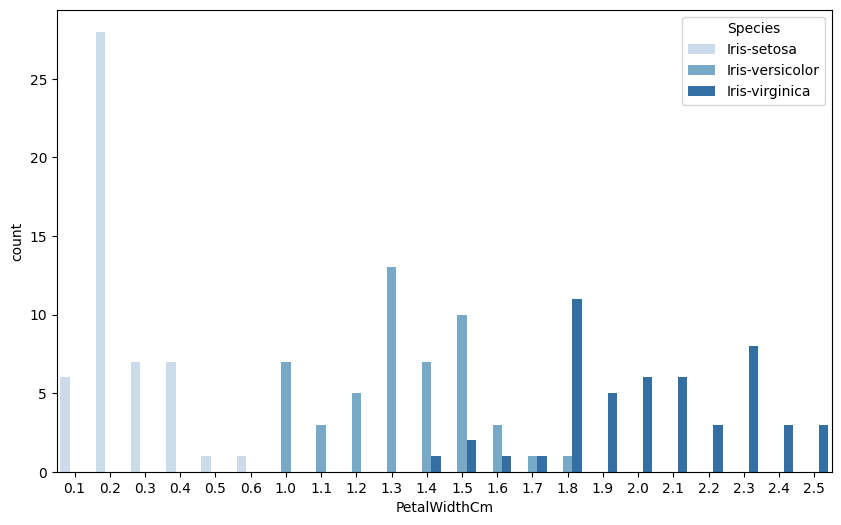

In [56]:
plt.figure(figsize =(10,6))
sns.countplot(x='PetalWidthCm', data=data_set, hue= data_set['Species'], palette= 'Blues')
plt.show()

<ipython-input-57-66f046c37a0d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_set.corr()


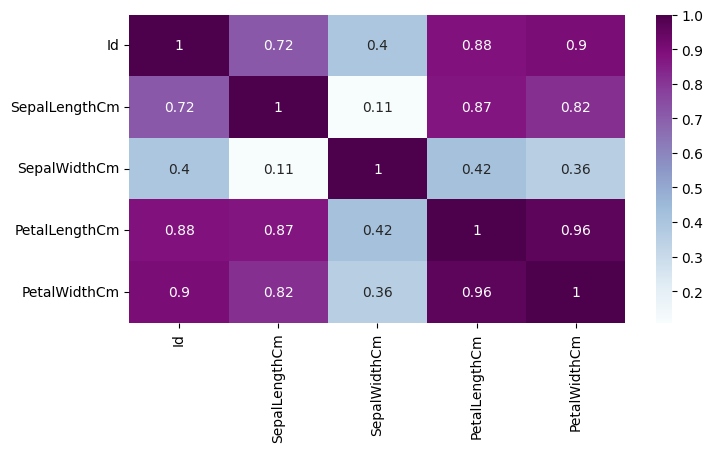

In [57]:
plt.figure(figsize=(8,4))
corr=data_set.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");

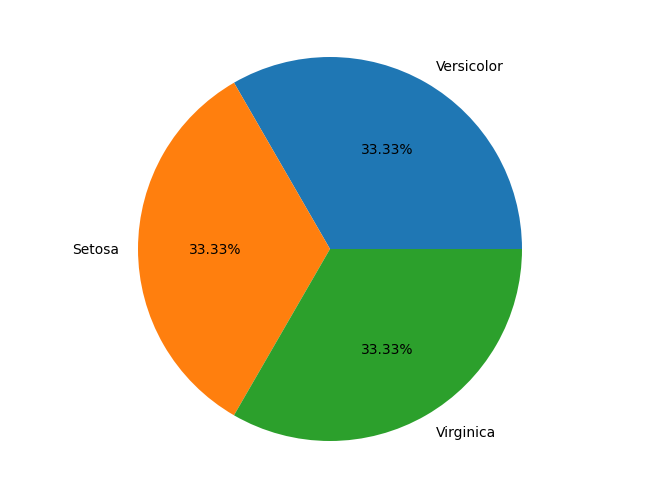

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

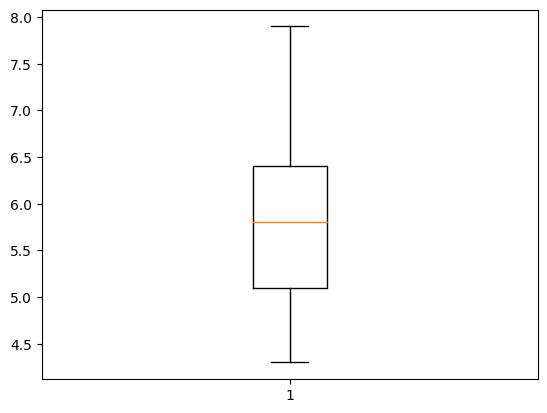

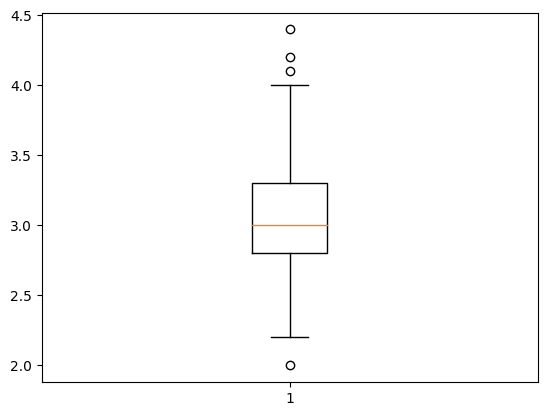

In [59]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([data_set['SepalLengthCm']])
plt.figure(2)
plt.boxplot([data_set['SepalWidthCm']])
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

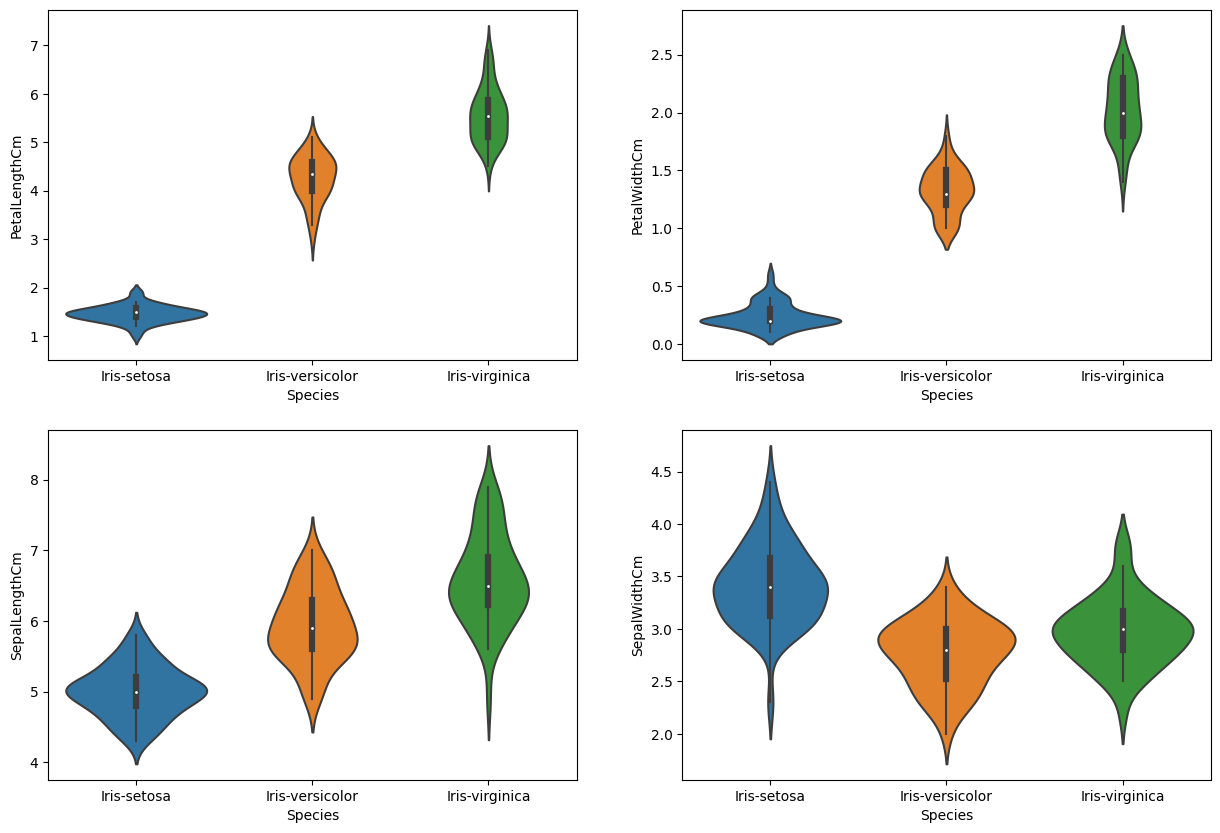

In [60]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data_set)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data_set)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data_set)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data_set)

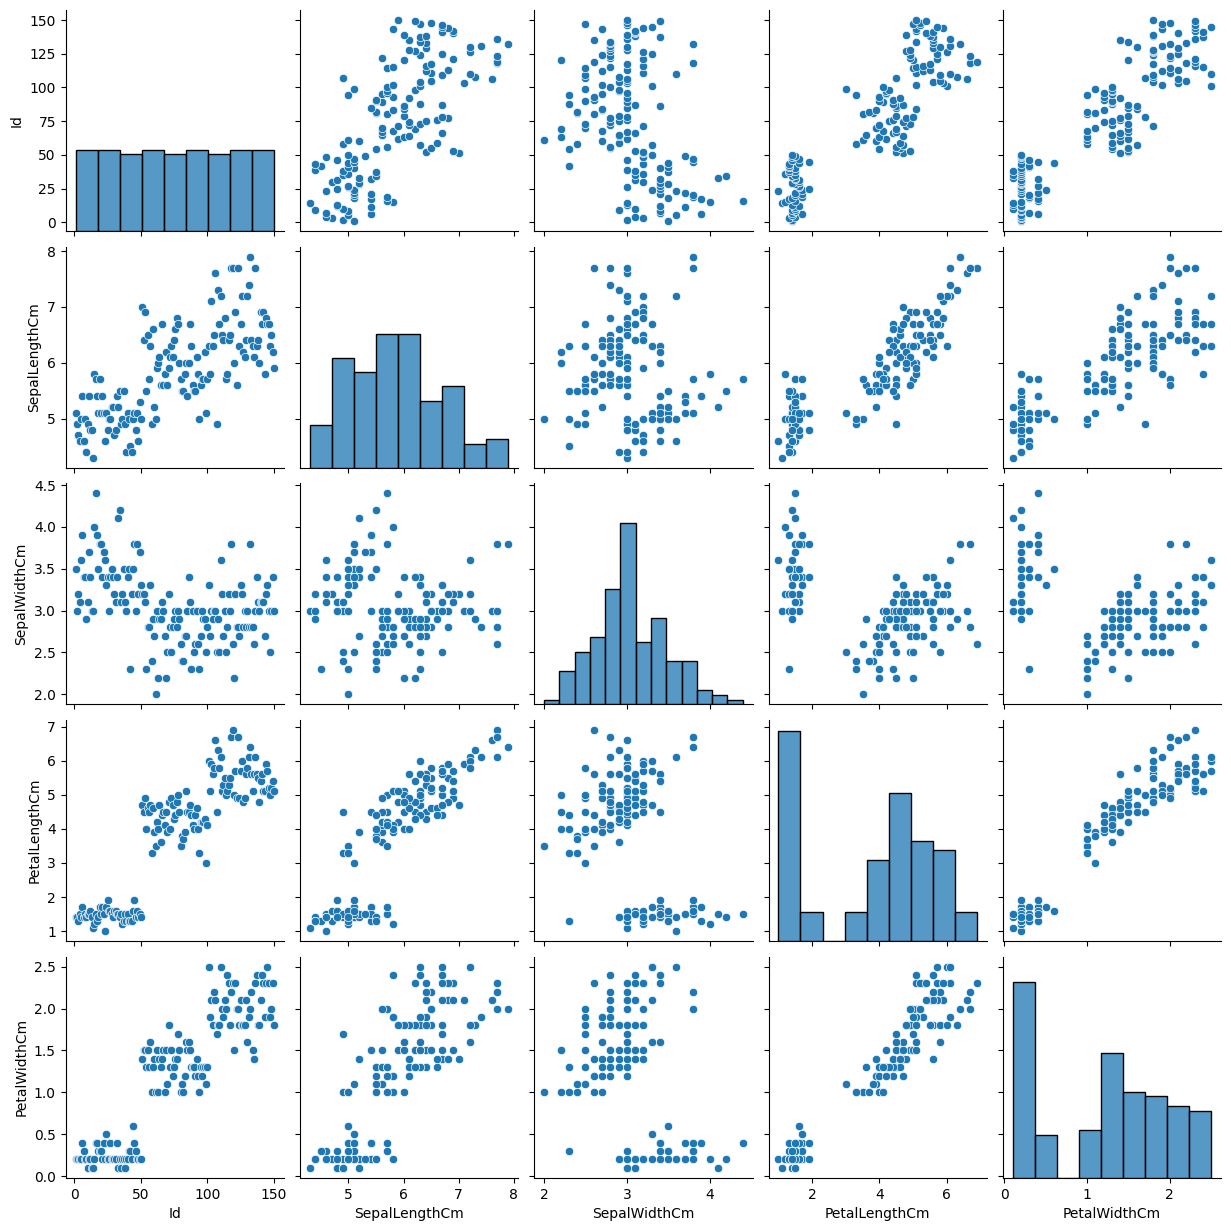

In [61]:
sns.pairplot(data_set)

5. Model Building

In [62]:
train, test = train_test_split(data_set, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [63]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [64]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
16,5.4,3.9,1.3,0.4
28,5.2,3.4,1.4,0.2
30,4.8,3.1,1.6,0.2
5,5.4,3.9,1.7,0.4
148,6.2,3.4,5.4,2.3


In [65]:
test_y.head()

42        Iris-setosa
108    Iris-virginica
1         Iris-setosa
7         Iris-setosa
141    Iris-virginica
Name: Species, dtype: object

1. Logistic Regression

In [66]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[10  0  0]
 [ 0 14  0]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        38
      macro avg       0.98      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



2. KNN Neighbours

In [68]:
#Using KNN Neighbors
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(train_X,train_y)
y_pred2 = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9473684210526315


In [69]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[10  0  0]
 [ 0 14  0]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        38
      macro avg       0.98      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



3. Support Vector

In [70]:
#Using Support Vector
from sklearn.svm import SVC
model2 = SVC()
model2.fit(train_X,train_y)

pred_y = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9473684210526315


4. Decision Tree

In [71]:
#Using Decision Tree
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


Conclusion :
1. Flowers having more density with higher sepal length is Virginica.

2. Flowers having more density with higher sepal Width is Setosa.



3. Setosa have less petal length than Virginica.

4. We should use Logistic Regression.